# 1. Import libraries and datasets.

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import GroupKFold
from sklearn.preprocessing import OrdinalEncoder

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [3]:
train = pd.read_csv('inputs/Train.csv')
test = pd.read_csv('inputs/Test.csv')
ss = pd.read_csv('inputs/SampleSubmission.csv')
variable_data = pd.read_csv('inputs/variable_descriptions.csv')

train.head()

,ward,total_households,total_individuals,target,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,...,pw_03,pw_04,pw_05,pw_06,pw_07,pw_08,ADM4_PCODE,lat,lon,NL
0,41601001: Ward 1,1674.45058,5888.20750,16.773757,0.933841,0.000846,0.005490,0.000676,0.000000,0.001372,...,0.002848,0.007537,0.000000,0.012928,0,0,ZA4161001,-29.682270,24.734743,0.292039
1,41601002: Ward 2,1736.99230,6735.33812,21.496661,0.696940,0.001253,0.004402,0.000000,0.002301,0.001323,...,0.014566,0.057127,0.019092,0.004131,0,0,ZA4161002,-29.119311,24.757737,3.207775
2,41601003: Ward 3,2403.57591,7273.04995,10.931425,0.810545,0.004517,0.008891,0.003986,0.007735,0.000956,...,0.057560,0.010358,0.001421,0.040881,0,0,ZA4161003,-29.142276,25.094093,0.000000
3,41601004: Ward 4,1740.78737,5734.49046,23.119257,0.659914,0.000000,0.006129,0.000000,0.000813,0.037245,...,0.000000,0.000669,0.000000,0.005011,0,0,ZA4161004,-29.372052,24.942867,2.038778
4,41601005: Ward 5,1730.51451,6657.23835,13.652252,0.950575,0.000655,0.001473,0.000598,0.006999,0.000818,...,0.004859,0.001290,0.000673,0.017629,0,0,ZA4161005,-29.409381,25.290165,0.000000


In [4]:
dw_cols = [cols for cols in train if cols.startswith('dw')]
psa_cols = [cols for cols in train if cols.startswith('psa')]
stv_cols = [cols for cols in train if cols.startswith('stv')]
car_cols = [cols for cols in train if cols.startswith('car')]
lln_cols = [cols for cols in train if cols.startswith('lln')]
lan_cols = [cols for cols in train if cols.startswith('lan')]
pg_cols = [cols for cols in train if cols.startswith('pg')]
pw_cols = [cols for cols in train if cols.startswith('pw')]

# 2.Data Wrangling + Feature engineering + EDA.

![1.png](inputs/1.png)

<AxesSubplot:>

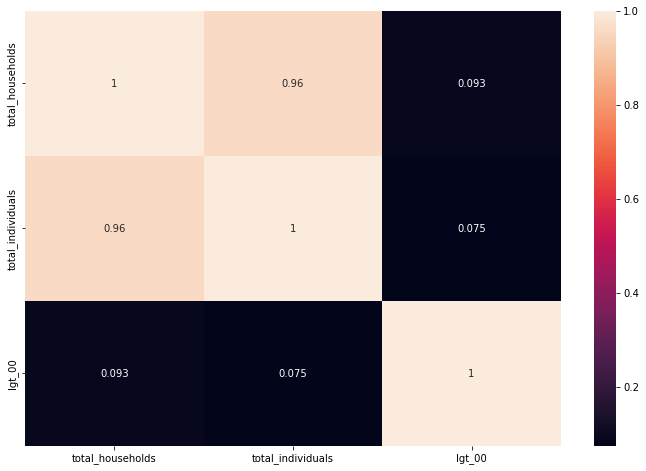

In [7]:
corr = train[['total_households', 'total_individuals', 'lgt_00']].corr()
plt.figure(figsize = (12, 8))
sns.heatmap(corr.abs(), annot = True)

<AxesSubplot:>

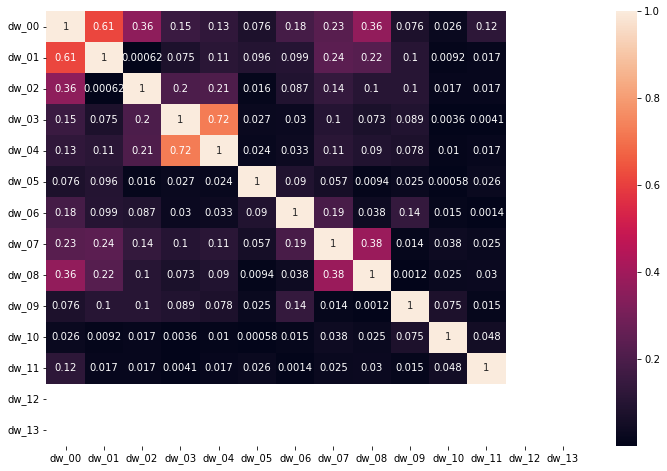

In [5]:
dw_cols = [cols for cols in train.columns if cols.startswith('dw')]
corr = train[dw_cols].corr()
plt.figure(figsize = (12, 8))
sns.heatmap(corr.abs(), annot = True)

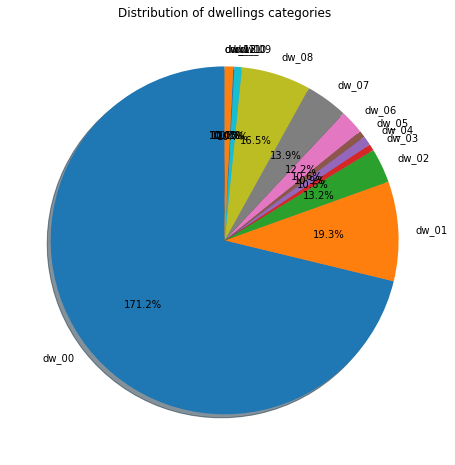

In [6]:
plt.figure(figsize = (12, 8))
plt.title('Distribution of dwellings categories')
plt.pie(train[dw_cols].mean(), labels = train[dw_cols].mean().index, shadow = True, autopct = '1%.1f%%', startangle = 90)
plt.show()

In [7]:
#DW 12 and dw_13 do not have any values, hence we drop them.

#DW 01 and dw_02 seems to be highly correlated, also dw_03 and dw_04. Hence, we need to:
#1. Drop one of them.
#2. Get their sum and drop one column.
#The same case applies to dw_03 and dw_04


## PSA, stv, car, lln.
#These pairs of columns also have very high correlation.
#We can choose to:
#1. Find the sum of each pair as done in notebook 'Solution 2' and drop one.
#2. Drop one column.

![2.png](inputs/2.png)

<AxesSubplot:title={'center':'Percentage listing present in schools'}>

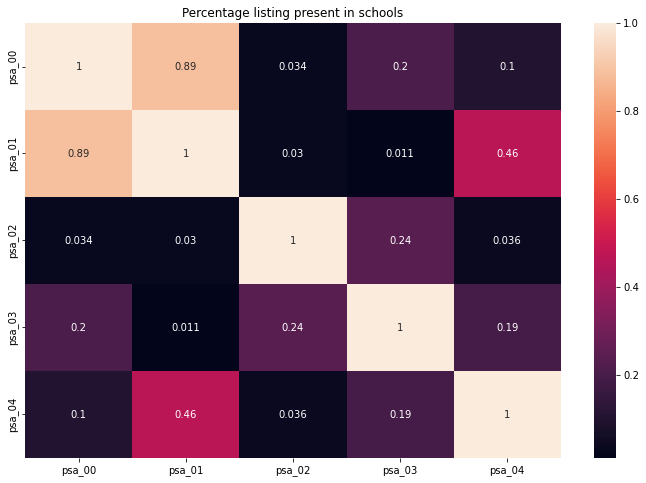

In [8]:
corr = train[psa_cols].corr()
plt.figure(figsize = (12, 8))
plt.title('Percentage listing present in schools')
sns.heatmap(corr.abs(), annot = True)

In [12]:
#psa_02, and psa_03 can be combined into one feature.

In [ ]:
# PSA, stv, car, lln.

<AxesSubplot:>

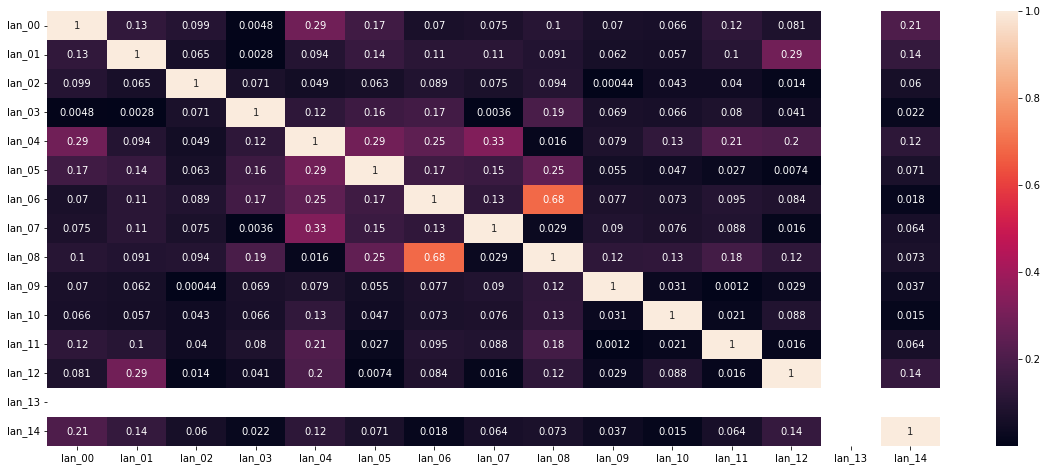

In [10]:
corr = train[lan_cols].corr()
plt.figure(figsize = (20, 8))
sns.heatmap(corr.abs(), annot = True)

In [11]:
# From the above plot, we can see that lan_08 and lan_06 are highly correlational.
# We can decide to :
# 1. Drop one column.
# 2. Find the sum of both columns and drop one.

# We also need to drop columns lan_13 as it has no values'
#From the pie chart, we find that some language distributions are over-represented compared to others.
#We can find the sum of the under-represented categories and compare it with the over-represented language categories.S

<AxesSubplot:>

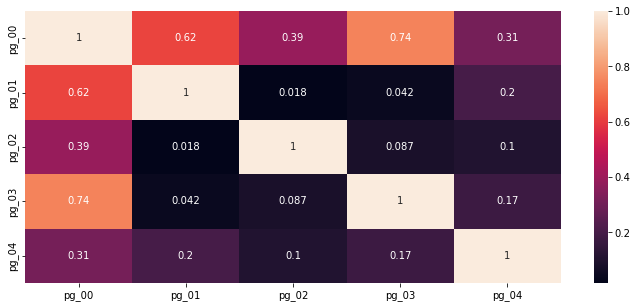

In [12]:
#########################
#PG columns. (Population group columns.)
pg_cols = [cols for cols in train.columns if cols.startswith('pg')]

corr = train[pg_cols].corr()
plt.figure(figsize = (12, 5))
sns.heatmap(corr.abs(), annot = True)
# From the below plot, we can see that pg_01 and pg_00 are highly correlational.
# We can decide to :
# 1. Drop one column.
# 2. Find the sum of both columns and drop one.

<AxesSubplot:>

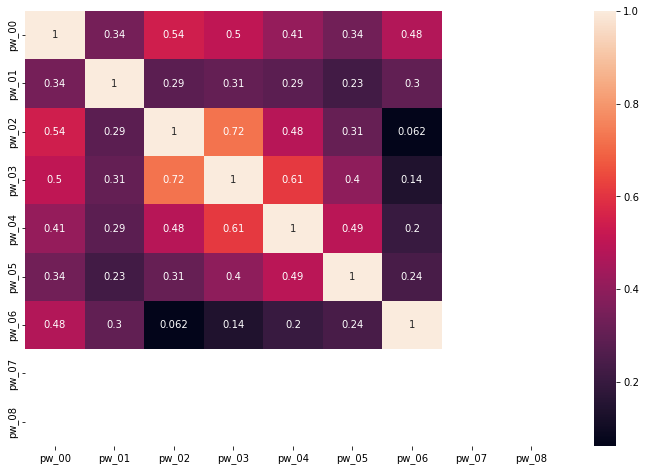

In [15]:
####################################
#PW Piped water columns.
pw_cols = [cols for cols in train.columns if cols.startswith('pw')]

corr = train[pw_cols].corr()
plt.figure(figsize = (12, 8))
sns.heatmap(corr.abs(), annot = True)

# From the below plot, we can see that pw_02 and pw_03 are highly correlational.
# We can decide to :
# 1. Drop one column.
# 2. Find the sum of both columns and drop one.
#pw_07 and pw_08 have no values, hence we drop them.

![3](inputs/3.png)

<AxesSubplot:xlabel='lat', ylabel='lon'>

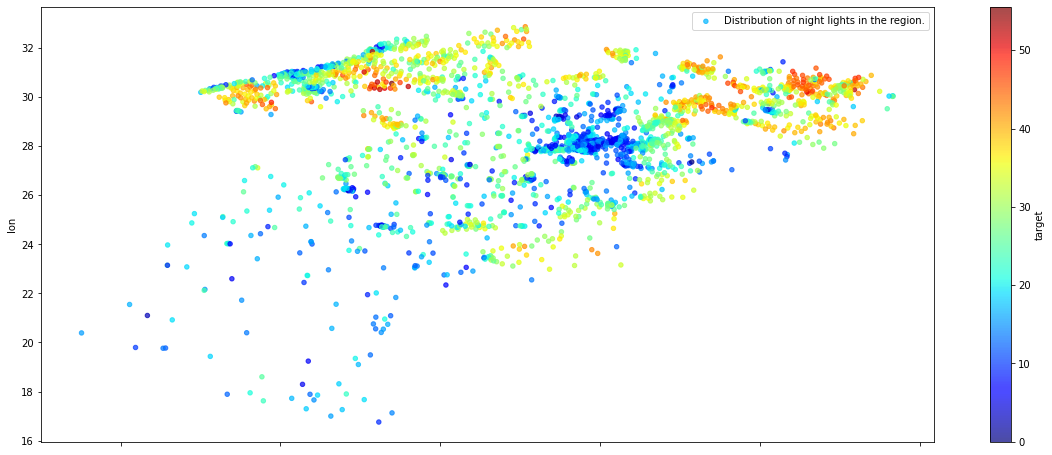

In [6]:
train.plot(kind = 'scatter', x = 'lat', y = 'lon', alpha = 0.7,
           label = 'Distribution of night lights in the region.', c = 'target',
           cmap = plt.get_cmap('jet'), colorbar = True, figsize = (20, 8))

<AxesSubplot:xlabel='target', ylabel='Count'>

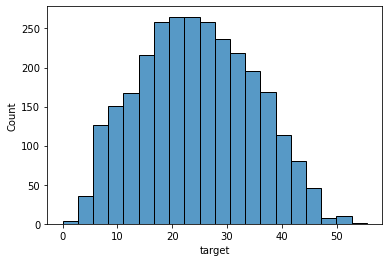

In [11]:
sns.histplot(train.target, bins = 20)

In [13]:
PATTERN = r'[\d\s]+:'
for dataset in (train, test):
    dataset['Ward_Category'] = dataset['ward'].str.replace(PATTERN, '', regex = True)

<AxesSubplot:title={'center':'Distribution of ward categories across all wards'}, xlabel='Ward_Category'>

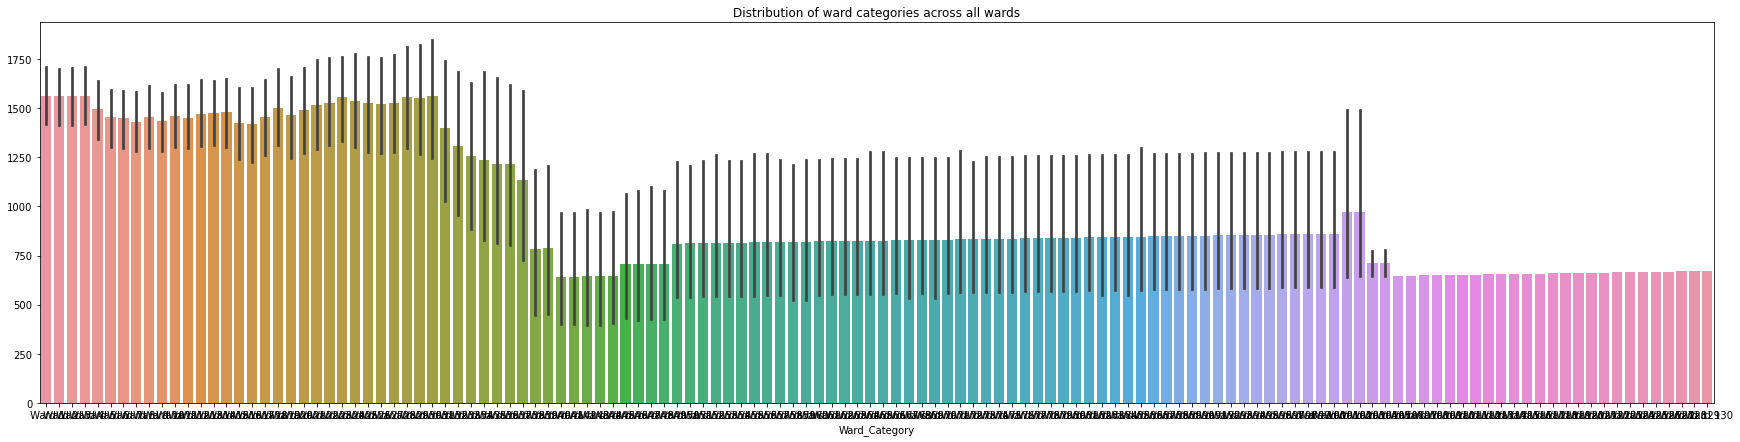

In [20]:
plt.figure(figsize = (30, 7))
plt.title('Distribution of ward categories across all wards')
sns.barplot(x = train.Ward_Category, y = train.index)

In [14]:
##Some ward categories are over-represented compared to others. We can fix it using oversampling and undersampling techniques.

# 1. Find relationships between higher-level features, e.g, 
- dwelling house categry and ward category,
- percentage of people with cars and school attendance.

In [14]:
#Make a copy of train and test data.
copy_train = train.copy()
copy_test = test.copy()

In [16]:
def create_code_category(data_frame):
    data_frame['Code_Category'] = data_frame['ADM4_PCODE'].str[:3]
    data_frame['Code_Category'] = data_frame['Code_Category'].map({
        'ZA5' : 'ZA5', 'ZA7' : 'ZA7', 'ZA9' : 'ZA9',
        'ZA6' : 'ZA6', 'ZA8' : 'ZA8', 'ZA4' : 'ZA4',
        'ZA3' : 'ZA3', 'ZA2' : 'ZA2', 'ZA1' : 'ZA1'})
    return data_frame

copy_train = create_code_category(copy_train)
copy_test = create_code_category(copy_test)

In [17]:
#Language columns.
#Filter under-represented language categories.
lan_cols_sum = [cols for cols in copy_train[lan_cols].columns if copy_train[cols].mean() < 0.1]
lan_cols_sum

['lan_00',
 'lan_01',
 'lan_02',
 'lan_03',
 'lan_08',
 'lan_09',
 'lan_10',
 'lan_11',
 'lan_12',
 'lan_13',
 'lan_14']

In [18]:
PATTERN = r'[\d\s]+:'

for dataset in (copy_train, copy_test):
    dataset['Ward_Category'] = dataset['ward'].str.replace(PATTERN, '', regex = True)
    dataset['sum_lan_cols'] = dataset[lan_cols_sum].sum(axis = 1)
    dataset['sum_dw01_dw02'] = dataset['dw_01'] + dataset['dw_02']
    dataset['sum_dw03_dw04'] = dataset['dw_03'] + dataset['dw_04']
    dataset['sum_pg01_to_04'] = dataset[pg_cols[1:]].sum(axis = 1)
    dataset['sum_pw03_pw07'] = dataset['pw_03'] + dataset['pw_07']
    dataset['sum_psa02_psa03'] = dataset['psa_02'] + dataset['psa_03']
    dataset['sum_pw02_pw03'] = dataset['pw_02'] + dataset['pw_03']

In [19]:
cat_cols = [cols for cols in copy_train.columns if copy_train[cols].dtypes == 'object']
cat_cols

['ward', 'ADM4_PCODE', 'Ward_Category', 'Code_Category']

In [20]:
X = copy_train.copy()
y = X.pop('target')

cols_to_drop = ['ADM4_PCODE','ward', 'psa_01', 'stv_01', 'car_01', 'lln_01', 'dw_01', 'dw_03',
                 'pg_01', 'pg_02', 'pg_03', 'pg_04', 'pw_02', 'pw_07', 'pw_08', 'dw_13',
                'lan_00', 'lan_01', 'lan_02', 'lan_03', 'lan_08', 'lan_09', 'lan_10', 'lan_11','lan_12','lan_13',
                'lan_14', 'dw_12', 'psa_02', 'psa_03', 'pw_02', 'pw_03', 'total_individuals']
X = X.drop(cols_to_drop, axis = 1)

In [21]:
encoder = OrdinalEncoder(handle_unknown = 'error')
copy_train = encoder.fit_transform(copy_train[cat_cols])
copy_test = encoder.fit_transform(copy_test[cat_cols])


In [22]:
# #Label encode categorical columns
# for colname in X.select_dtypes(include = 'object'):
#     X[colname], _ = X[colname].factorize()


# discrete_features = X.dtypes == int

In [23]:
X.columns.values

array(['total_households', 'dw_00', 'dw_02', 'dw_04', 'dw_05', 'dw_06',
       'dw_07', 'dw_08', 'dw_09', 'dw_10', 'dw_11', 'psa_00', 'psa_04',
       'stv_00', 'car_00', 'lln_00', 'lan_04', 'lan_05', 'lan_06',
       'lan_07', 'pg_00', 'lgt_00', 'pw_00', 'pw_01', 'pw_04', 'pw_05',
       'pw_06', 'lat', 'lon', 'NL', 'Ward_Category', 'Code_Category',
       'sum_lan_cols', 'sum_dw01_dw02', 'sum_dw03_dw04', 'sum_pg01_to_04',
       'sum_pw03_pw07', 'sum_psa02_psa03', 'sum_pw02_pw03'], dtype=object)

In [44]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features = discrete_features)
    mi_scores = pd.Series(mi_scores, name = 'MI scores', index = X.columns)
    mi_scores = mi_scores.sort_values(ascending = False)
    return mi_scores

In [45]:
mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores

psa_00              0.538925
pw_00               0.520084
car_00              0.508647
pg_00               0.503256
sum_pg01_to_04      0.503256
lln_00              0.442385
sum_lan_cols        0.424741
stv_00              0.376607
lat                 0.302020
psa_04              0.292584
lon                 0.286512
lan_04              0.270414
lan_07              0.258842
lan_06              0.252473
NL                  0.251128
Code_Category       0.247339
dw_04               0.226299
pw_06               0.211265
dw_06               0.207693
lan_05              0.204303
sum_dw03_dw04       0.191906
sum_pw02_pw03       0.175180
dw_07               0.172158
sum_pw03_pw07       0.171786
lgt_00              0.160634
pw_04               0.156639
pw_01               0.153554
dw_09               0.145481
total_households    0.144994
dw_05               0.144000
sum_dw01_dw02       0.138973
dw_08               0.129203
pw_05               0.126392
dw_02               0.110638
sum_psa02_psa0

In [46]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending = True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title('Mutual Information scores')

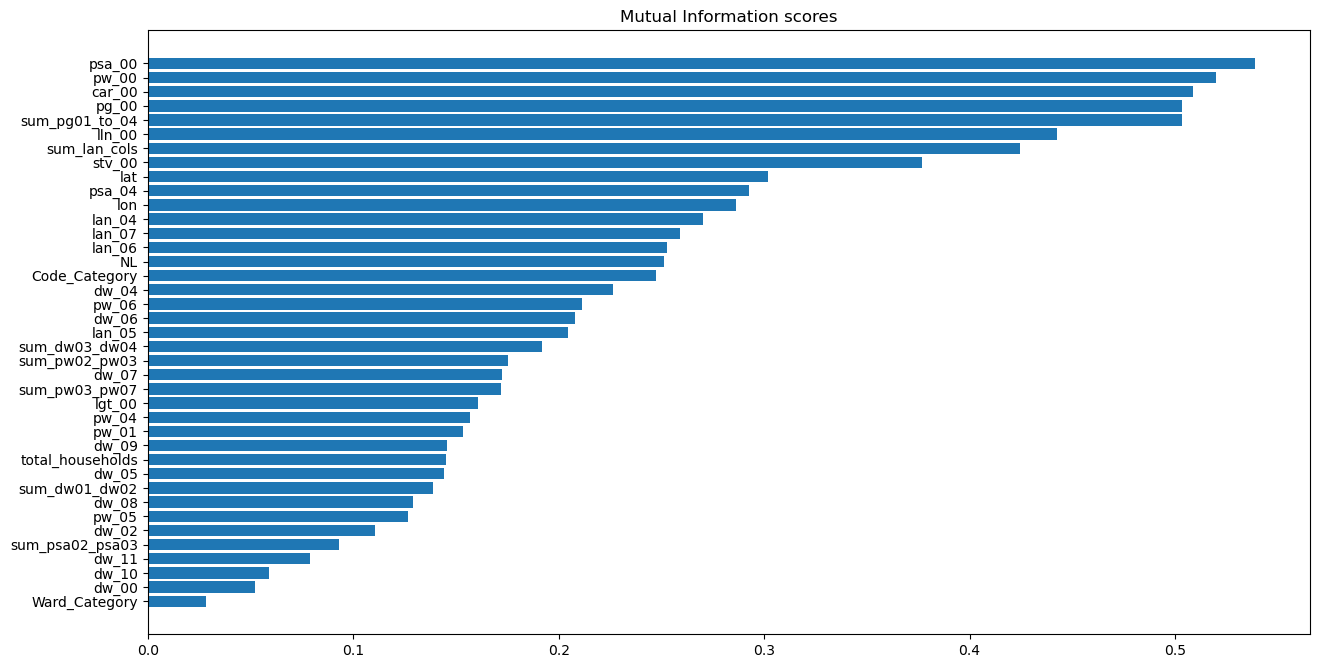

In [53]:
plt.figure(dpi = 100, figsize = (15, 8))
plot_mi_scores(mi_scores)

In [25]:
#Misc categories.
misc_cols = ['NL', 'Ward_Category', 'Code_Category']
copy_train[misc_cols]

,NL,Ward_Category,Code_Category
0,0.292039,Ward 1,ZA4
1,3.207775,Ward 2,ZA4
2,0.000000,Ward 3,ZA4
3,2.038778,Ward 4,ZA4
4,0.000000,Ward 5,ZA4
...,...,...,...
2817,9.118927,Ward 1,ZA3
2818,1.697395,Ward 2,ZA3
2819,2.792501,Ward 3,ZA3
2820,2.793699,Ward 4,ZA3


<AxesSubplot:xlabel='lat', ylabel='lon'>

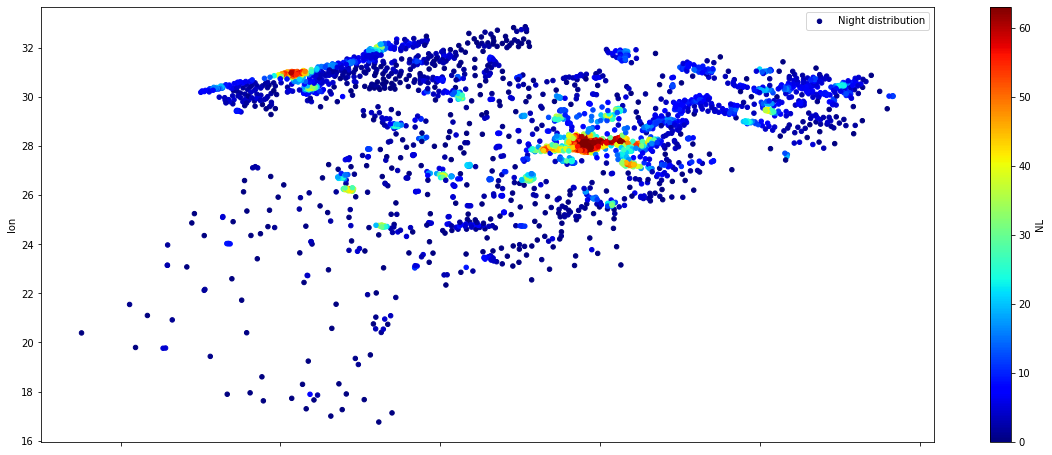

In [28]:
copy_train.plot(kind = 'scatter', x = 'lat', y = 'lon', c = 'NL', 
                figsize = (20, 8), cmap = plt.get_cmap('jet'), colorbar = True,
                label = 'Night distribution')

<AxesSubplot:>

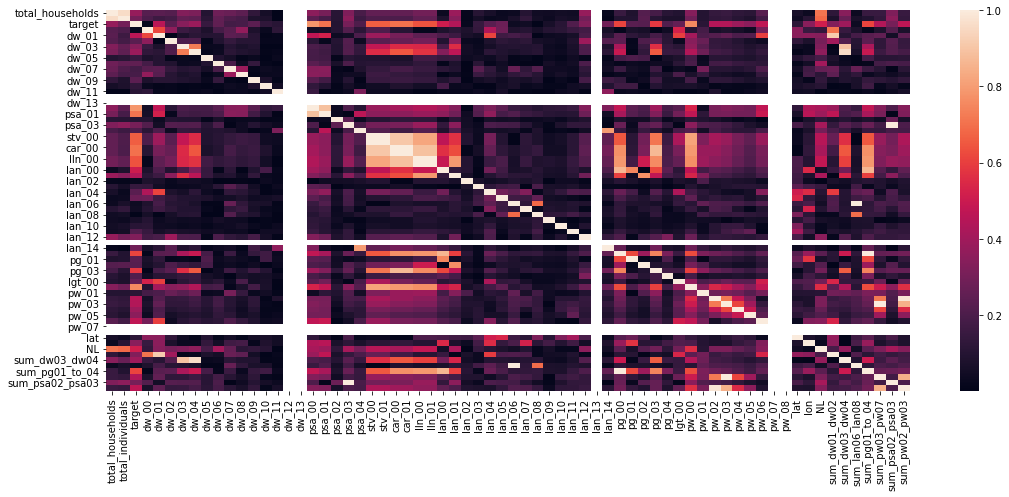

In [34]:
#Relationship between various features and NL.

corr = copy_train.corr()
plt.figure(figsize = (18, 7))
sns.heatmap(corr.abs(), annot = False)

In [38]:
#Filter high correlation features.
corr_matrix = X.corr().abs()
mask = np.triu(np.ones_like(corr_matrix, dtype = bool))

to_drop = [cols for cols in X.columns if any (X[cols] > 0.90)]

['total_households',
 'total_individuals',
 'dw_00',
 'dw_02',
 'dw_11',
 'psa_04',
 'car_00',
 'lan_00',
 'lan_01',
 'lan_04',
 'lan_05',
 'lan_07',
 'lan_09',
 'lan_10',
 'lan_11',
 'lan_14',
 'pg_00',
 'lgt_00',
 'pw_00',
 'pw_01',
 'pw_06',
 'lon',
 'NL',
 'Ward_Category',
 'Code_Category',
 'sum_dw01_dw02',
 'sum_lan06_lan08',
 'sum_pg01_to_04',
 'sum_pw02_pw03']

In [49]:
NL_psa = pd.concat([copy_train['NL'], copy_train[psa_cols]], axis = 1)
NL_psa

,NL,psa_00,psa_01,psa_02,psa_03,psa_04
0,0.292039,0.260191,0.607898,0.000188,0.010018,0.121705
1,3.207775,0.290228,0.549788,0.000000,0.021336,0.138647
2,0.000000,0.186435,0.677005,0.000489,0.021315,0.114757
3,2.038778,0.281229,0.593281,0.000579,0.007249,0.117663
4,0.000000,0.196687,0.517578,0.000989,0.005148,0.279598
...,...,...,...,...,...,...
2817,9.118927,0.249796,0.548069,0.000199,0.056862,0.145074
2818,1.697395,0.243611,0.597921,0.000000,0.045679,0.112790
2819,2.792501,0.253504,0.567502,0.001193,0.056393,0.121409
2820,2.793699,0.272915,0.551838,0.000330,0.055723,0.119195


In [52]:
train['lgt_00']

0       0.919424
1       0.959259
2       0.826164
3       0.986151
4       0.957376
          ...   
2817    0.977207
2818    0.970073
2819    0.965148
2820    0.890976
2821    0.680815
Name: lgt_00, Length: 2822, dtype: float64

In [56]:
lan_cols = ['sum_lan_cols', 'lan_04', 'lan_05', 'lan_06', 'lan_07']
copy_train[lan_cols]

/tmp/ipykernel_26981/1672670294.py:2: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  copy_train[lan_cols]


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [57]:
lan_cols

['sum_lan_cols', 'lan_04', 'lan_05', 'lan_06', 'lan_07']

<AxesSubplot:>

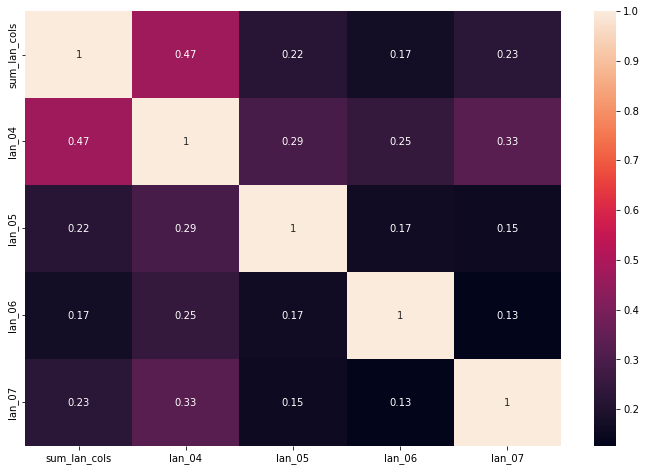

In [62]:
corr = X[lan_cols].corr()
plt.figure(figsize = (12, 8))
sns.heatmap(corr.abs(), annot = True)

<AxesSubplot:>

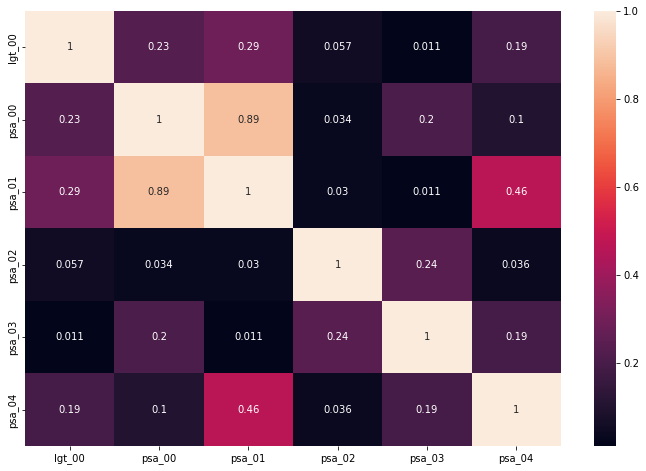

In [131]:
corr = train[['lgt_00','psa_00', 'psa_01', 'psa_02', 'psa_03', 'psa_04']].corr()
plt.figure(figsize = (12, 8))
sns.heatmap(corr.abs(), annot = True)
#'psa_00', 'psa_01', 'psa_02', 'psa_03', 'psa_04'

In [138]:
train[_cols]

,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,dw_07,dw_08,dw_09,dw_10,dw_11,dw_12,dw_13
0,0.933841,0.000846,0.005490,0.000676,0.000000,0.001372,0.005750,0.031466,0.008080,0.002823,0.001431,0.008224,0,0
1,0.696940,0.001253,0.004402,0.000000,0.002301,0.001323,0.007575,0.123547,0.151910,0.001486,0.001253,0.008010,0,0
2,0.810545,0.004517,0.008891,0.003986,0.007735,0.000956,0.006686,0.022632,0.129902,0.000000,0.000000,0.004150,0,0
3,0.659914,0.000000,0.006129,0.000000,0.000813,0.037245,0.005255,0.068909,0.218786,0.000000,0.000000,0.002947,0,0
4,0.950575,0.000655,0.001473,0.000598,0.006999,0.000818,0.004985,0.009150,0.015382,0.008693,0.000000,0.000673,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2817,0.874972,0.003146,0.017230,0.004735,0.048888,0.000654,0.017798,0.005539,0.010383,0.004955,0.003680,0.008020,0,0
2818,0.636235,0.002262,0.010433,0.000000,0.003030,0.000000,0.008028,0.095099,0.210044,0.010001,0.003154,0.021716,0,0
2819,0.855975,0.006601,0.061118,0.000812,0.003912,0.000812,0.017205,0.036566,0.008099,0.001102,0.000000,0.007797,0,0
2820,0.792552,0.004423,0.016099,0.000000,0.000674,0.000000,0.006907,0.038522,0.116643,0.004255,0.014031,0.005894,0,0


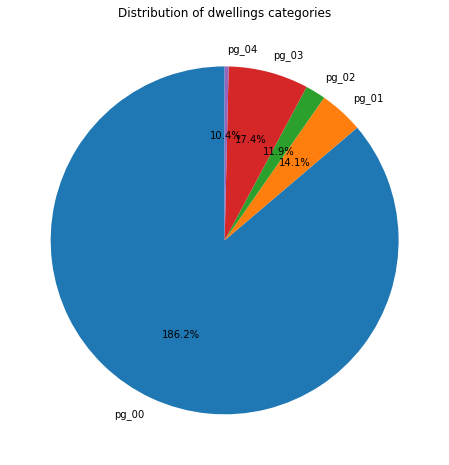

In [141]:
plt.figure(figsize = (12, 8))
plt.title('Distribution of dwellings categories')
plt.pie(train[pg_cols].mean(), labels = train[pg_cols].mean().index, shadow = False, autopct = '1%.1f%%', startangle = 90)
plt.show()

In [144]:
train[pg_cols].describe()

,pg_00,pg_01,pg_02,pg_03,pg_04
count,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000
mean,0.862142,0.040938,0.018798,0.074429,0.003693
std,0.247392,0.142317,0.077927,0.169270,0.010813
min,0.011053,0.000000,0.000000,0.000000,0.000000
25%,0.875275,0.001015,0.000877,0.000451,0.000664
50%,0.989752,0.003124,0.001797,0.001208,0.001696
75%,0.995618,0.012582,0.004883,0.041841,0.004126
max,1.000000,0.969519,0.939564,0.940563,0.367842


In [191]:
copy_train = train[pg_cols].copy()
copy_train

,pg_00,pg_01,pg_02,pg_03,pg_04
0,0.357455,0.563166,0.004260,0.072996,0.002123
1,0.698428,0.278006,0.003695,0.015835,0.004036
2,0.672452,0.154225,0.002181,0.167494,0.003649
3,0.728014,0.263831,0.001806,0.000956,0.005393
4,0.753491,0.129654,0.004523,0.106953,0.005380
...,...,...,...,...,...
2817,0.387404,0.212121,0.005720,0.389049,0.005706
2818,0.619593,0.299108,0.004645,0.067416,0.009238
2819,0.551808,0.381817,0.008169,0.030560,0.027646
2820,0.366426,0.533979,0.006260,0.054636,0.038698


In [188]:
#Row selector, column selector.
print(copy_train.iloc[:1, 0].values)
#print(copy_train.iloc[:1, 1:])
print(copy_train.iloc[:1, 1:].values.sum())

print(np.where(copy_train.iloc[:1, 0] < copy_train.iloc[:1, 1:].values.sum(), 1, 0))

[0.3574554]
0.6425445979
[1]


In [197]:
copy_train

,pg_00,pg_01,pg_02,pg_03,pg_04
0,0.357455,0.563166,0.004260,0.072996,0.002123
1,0.698428,0.278006,0.003695,0.015835,0.004036
2,0.672452,0.154225,0.002181,0.167494,0.003649
3,0.728014,0.263831,0.001806,0.000956,0.005393
4,0.753491,0.129654,0.004523,0.106953,0.005380
...,...,...,...,...,...
2817,0.387404,0.212121,0.005720,0.389049,0.005706
2818,0.619593,0.299108,0.004645,0.067416,0.009238
2819,0.551808,0.381817,0.008169,0.030560,0.027646
2820,0.366426,0.533979,0.006260,0.054636,0.038698


In [201]:
copy_train.iloc[:, 2:]

,pg_02,pg_03,pg_04
0,0.004260,0.072996,0.002123
1,0.003695,0.015835,0.004036
2,0.002181,0.167494,0.003649
3,0.001806,0.000956,0.005393
4,0.004523,0.106953,0.005380
...,...,...,...
2817,0.005720,0.389049,0.005706
2818,0.004645,0.067416,0.009238
2819,0.008169,0.030560,0.027646
2820,0.006260,0.054636,0.038698


In [204]:
train[pg_cols[2:]]

,pg_02,pg_03,pg_04
0,0.004260,0.072996,0.002123
1,0.003695,0.015835,0.004036
2,0.002181,0.167494,0.003649
3,0.001806,0.000956,0.005393
4,0.004523,0.106953,0.005380
...,...,...,...
2817,0.005720,0.389049,0.005706
2818,0.004645,0.067416,0.009238
2819,0.008169,0.030560,0.027646
2820,0.006260,0.054636,0.038698


In [ ]:
#Loop through the train set and compare the sum of under-represented columns and the over-represented columns.
